## support vector machine
* 분류나 회귀분석에 사용가능한 기법
   + 분류쪽 성능이 뛰어나서 주로 분류에 많이 사용
* 신경망에 비해 간결해서 뛰어난 성능을 보여준 탓에
  신경망에 암흑기를 가져다 준 대표적인 머신러닝 알고리즘
* `이미지 인식`이나 `필체패턴 인식`과 같은 작업에 주로 사용
* `마진을 최대로 하는 결정경계를 찾는 것`이 SVM의 주된 알고리즘
* 결정경계는 서로 다른 분류값을 결정짓는 경계
   + line, plane(2D), hyperplane(3D)
* 마진은 `결정경계와 서포트벡터간의 거리`를 의미
* 서포트벡터는 `결정경계를 만드는데 영향을 주는 최전방 데이터`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [4]:
from sklearn.datasets import make_blobs

In [12]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.6,
                    random_state=0)

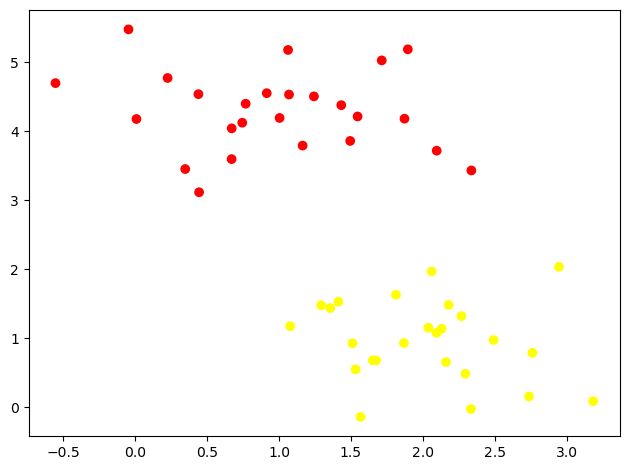

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.plot([0.6],[2.1],'x',color='blue') # 테스트 점
plt.tight_layout()

In [ ]:
# 빨간점과 노란점으로 구성된 집합을 적절히 구분하려고 할때
# 3개의 직선중 어느것이 가장 최적으로 분류한 것일까?
# 두 개의 데이터 집합을 잘 분리하는 직선을 그려봄

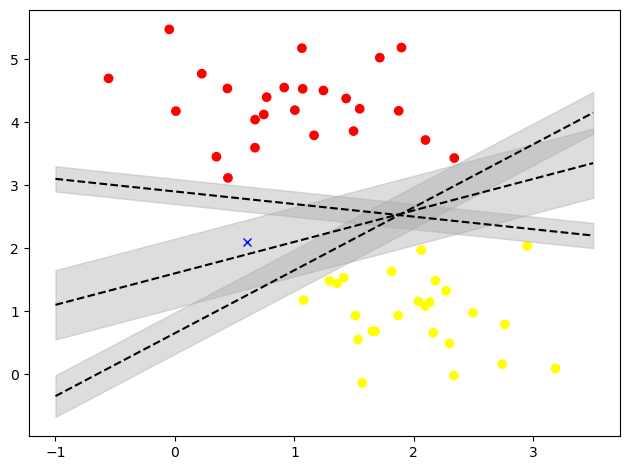

In [14]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.plot([0.6],[2.1],'x',color='blue') # 테스트 점

# 3개의 직선 긋기
xfit = np.linspace(-1, 3.5)
for m,b,d in [(1,0.65,0.33), (0.5,1.6,0.55), (-0.2,2.9,0.2)]: # 기울기, 절편, 마진
    yfit = m * xfit + b
    plt.plot(xfit, yfit, 'k--') # 점선 그리기
    plt.fill_between(xfit, yfit-d, yfit+d, color='#AAAAAA', alpha=0.4) # 마진 표시
    
plt.tight_layout()

In [ ]:
# 가운데 직선은 다른 두 직선에 비해 
# 비교적 여유(마진)있게 두 집합을 가르고 있음
# 이 덕택에 테스트 점 역시 여유있게 분류 가능
# 이렇게 최적으로 분류할 수 있는 직선을 통해
# 나눠진 영역을 초평면 hyperplane이라 함

## SVM을 이용해서 초평면 구하기

In [15]:
svmclf = SVC(kernel='linear')
svmclf.fit(X, y)
# 모델이 만들어짐

SVC(kernel='linear')

### 초평면 /서포트벡터 정보

In [17]:
svmclf.coef_, svmclf.intercept_  # 회기계수

(array([[ 0.22967329, -1.37758262]]), array([3.18971354]))

In [18]:
svmclf.support_vectors_  # 서포트벡터

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

#### 결정경계 시각화

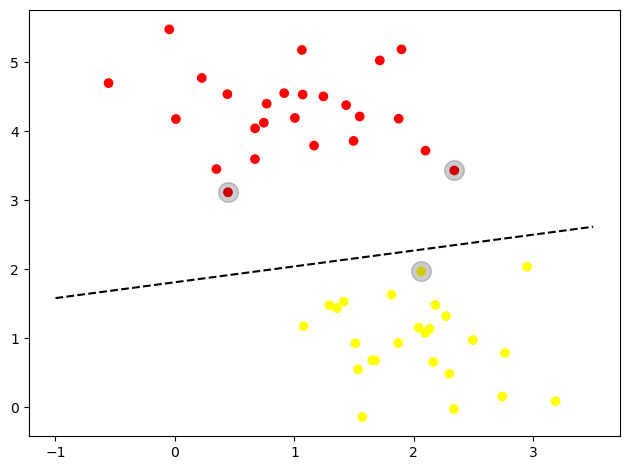

In [40]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.scatter(x=svmclf.support_vectors_[:,0], alpha=0.2,
            y=svmclf.support_vectors_[:,1], facecolor='k', s=200)

yfit = svmclf.coef_[0][0] * xfit + svmclf.intercept_[0] + svmclf.coef_[0][1]
plt.plot(xfit, yfit, 'k--') # 점선 그리기

plt.tight_layout()

## 비선형 분류
* 선형적으로 분류가 불가능한 경우에 대해서도 초평면을 구할 수 있을까?

In [41]:
from sklearn.datasets import make_circles

In [48]:
X, y = make_circles(n_samples=200, noise=0.05, random_state=2309261605)

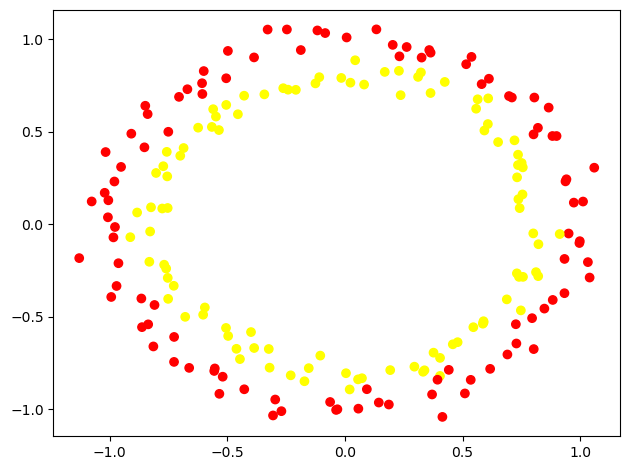

In [49]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.tight_layout()

## 커널 트릭
* 구분이 불가능한 집합은 구분이 가능한 방향으로 맵핑시킨<br>
  새로운 공간으로 전환해야 구분이 가능할 것임
* 차원을 변환시키는 mapping 함수를 통해 기존의 2차원 공간에<br>
  새로운 차원을 추가해서 3차원으로 변환할 수 있다면<br>
  선형적으로 구분이 가능해 짐
* 선형적으로 불가능한 차원을 `선형적으로 구분이 가능한 고차원으로 변환하는 것`을 `커널 트릭`이라 하고<br>
  이때 사용하는 함수를 `커널 함수`라 함
* 대표적인 커널함수는 카우시안 커널RBF이고 이것을 통해 무한대 차원으로 매핑 가능

#### 2차원 데이터를 3차원으로 변환후 시각화

In [51]:
from mpl_toolkits.mplot3d import Axes3D

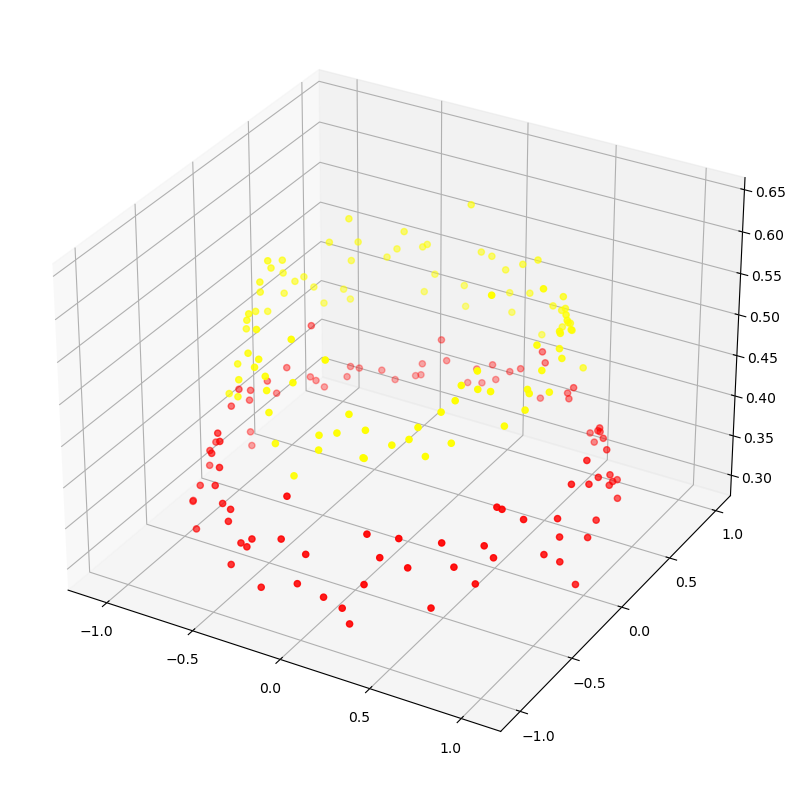

In [53]:
X, y = make_circles(n_samples=200,
        noise=0.04, random_state=0)

# 커널함수 : 2차원을 3차원으로 변환
z = np.exp(-(X ** 2).sum(1))

# 3차원으로 시각화
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], z, c=y, cmap='autumn')
plt.tight_layout()

### SVM을 이용해서 초평면 구하기

* SVC 초매개변수
    + C(cost) : 규제 매개변수 (정확도 제한)
    + gamma   : 결정경계 곡률(마진) 조정 (값이 크면 결정경계면은 좁아짐)

In [54]:
## SVM 규제/감마 매개변수 알아보기
!pip install mglearn

  Obtaining dependency information for mglearn from https://files.pythonhosted.org/packages/bb/8b/687d30a3df6b870af541dde6327423e35713e38243db135f57b4ebd054f3/mglearn-0.2.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 11.8 MB/s eta 0:00:0000:01


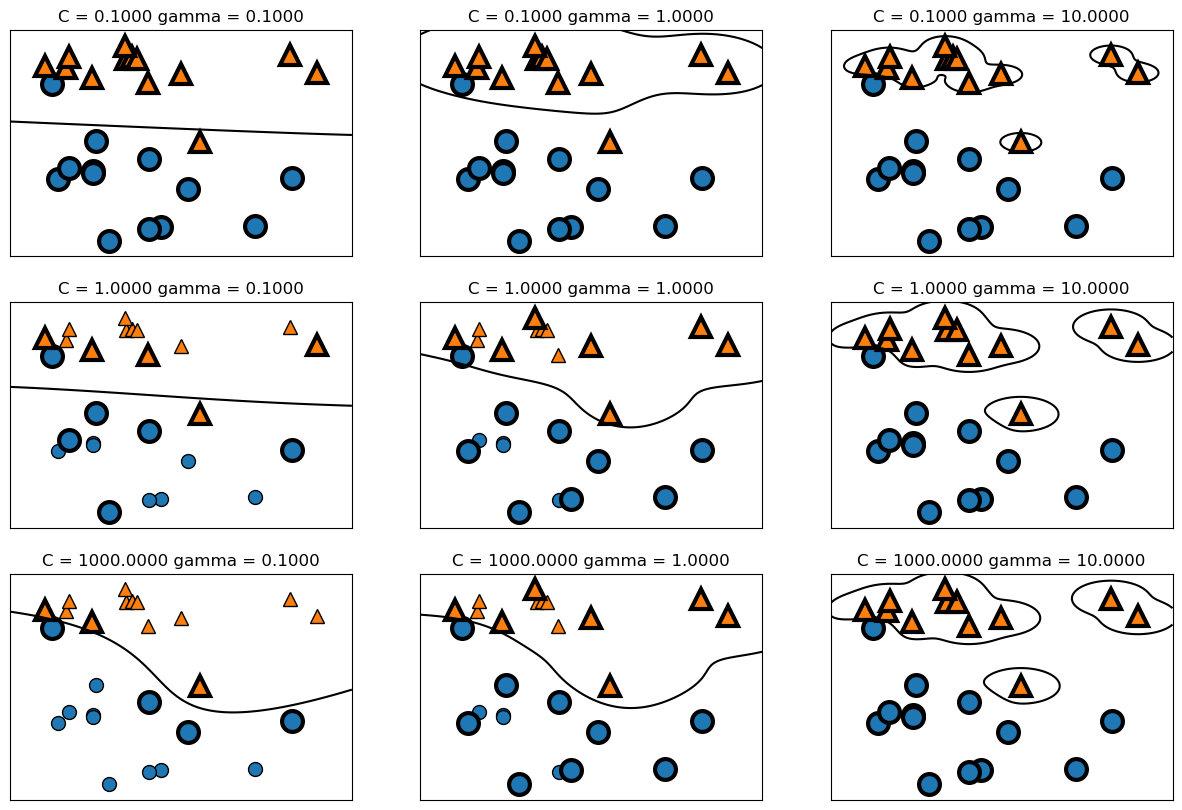

In [58]:
import mglearn

fig,axes = plt.subplots(3,3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1,2)):
       mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

In [59]:
svmclf = SVC(kernel='rbf', C=5, gamma=0.1, random_state=2309261605)
svmclf.fit(X, y)
svmclf.score(X, y)

0.995

In [60]:
import svm_visual as sv

/home/jovyan/svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


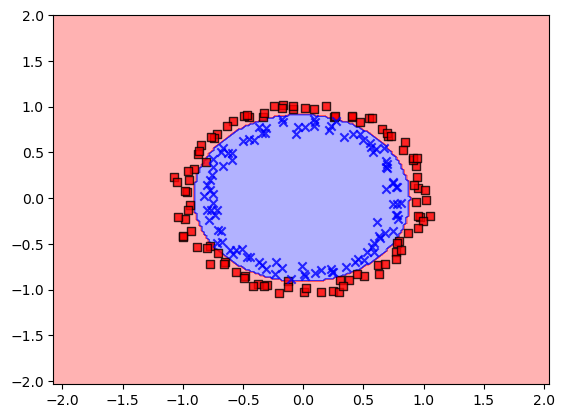

In [61]:
# plot_decision_regions(피처, 레이블, 분류기)
sv.plot_decision_regions(X, y, svmclf)

### iris 데이터를 SVM의 RBF커널로 분석

In [62]:
from sklearn.datasets import load_iris

In [75]:
iris = load_iris()
# data = iris.data
# data = iris.data[:, :2]  # 시각화를 위해 2컬럼씩 선별, sepal
data = iris.data[:, 2:]  # 시각화를 위해 2컬럼씩 선별, petal
target = iris.target

X_train, X_test, y_train, y_test= train_test_split(data, target, train_size=0.75,
                random_state=2309261705, stratify=target)

In [76]:
svmclf = SVC(kernel='rbf')
svmclf.fit(X_train, y_train)
svmclf.score(X_train, y_train)

0.9464285714285714

In [77]:
pred = svmclf.predict(X_test)
accuracy_score(pred, y_test)

0.9736842105263158

In [78]:
confusion_matrix(pred, y_test)

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 12]])

/home/jovyan/svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


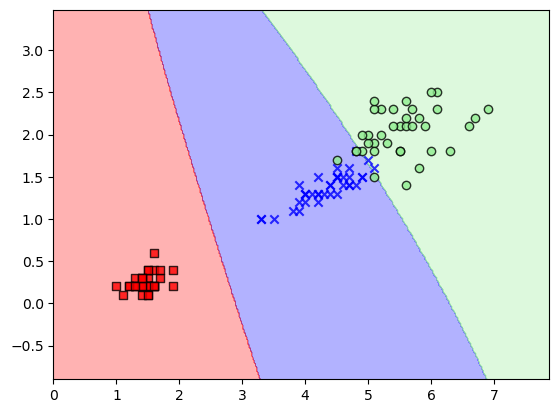

In [79]:
sv.plot_decision_regions(X_train, y_train, svmclf)

/home/jovyan/svm_visual.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


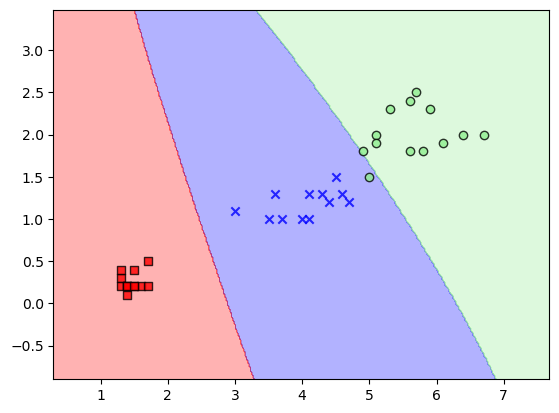

In [80]:
sv.plot_decision_regions(X_test, y_test, svmclf)

### 과일, 채소, 단백질 분류분석을 SVM으로 실시하세요